In [13]:
import gym
env = gym.make("Taxi-v3")
env.reset(seed=42)

386

In [3]:
pip install gym[box2d] numpy

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached pygame-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2373077 sha256=27c0984c11a1a2343d7e7a0ce4fee78052c2d7459396874bd78d89e010df1eef
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2


In [8]:
env.reset(seed=42)

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

In [2]:
pip install swig

  Using cached swig-4.1.1.post0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.8 MB)


In [3]:
import gym
import numpy as np
from collections import defaultdict


In [4]:
env = gym.make('Taxi-v3')


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
env.action_space.n

6

In [5]:
import numpy as np

class ApproximateQLearningAgent:
    def __init__(self, alpha, gamma, num_actions, num_states, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.alpha = alpha
        self.gamma = gamma
        self.weights = np.zeros((num_states, num_actions))
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def choose_action(self, state, action_mask):
        if np.random.rand() < self.epsilon:
            valid_actions = np.where(action_mask == 1)[0]
            return np.random.choice(valid_actions) if valid_actions.size > 0 else np.random.choice(range(len(action_mask)))
        else:
            q_values = self.get_q_values(state)
            masked_q_values = q_values * action_mask
            return np.argmax(masked_q_values)

    def get_q_values(self, state):
        return self.weights[state]

    def update(self, state, action, reward, next_state, done, action_mask):
        q_predict = self.get_q_values(state)[action]
        q_target = reward
        if not done:
            q_target += self.gamma * np.max(self.get_q_values(next_state) * action_mask)
        self.weights[state, action] += self.alpha * (q_target - q_predict)

    def update_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


In [103]:
def train_agent(episodes, alpha, gamma, env):
    agent = ApproximateQLearningAgent(alpha, gamma, env.action_space.n, 500, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01)
    rewards_per_episode = []
    for episode in range(episodes):
        print(f"Episode: {episode}")
        state = env.reset()
        done = False
        total_episode_reward = 0

        while not done:
            action_mask = np.ones(env.action_space.n)  # Assuming all actions are valid initially
            action = agent.choose_action(state, action_mask)
            next_state, reward, done, info = env.step(action)

            if "action_mask" in info:
                action_mask = info["action_mask"]

            agent.update(state, action, reward, next_state, done, action_mask)
            state = next_state
            total_episode_reward += reward

        # Update epsilon at the end of each episode
        agent.update_epsilon()
        rewards_per_episode.append(total_episode_reward)

    return agent,rewards_per_episode

In [104]:
agent ,rewards = train_agent(episodes=13000, alpha=0.1, gamma=0.999,env=env)

Streaming output truncated to the last 5000 lines.
Episode: 8000
Episode: 8001
Episode: 8002
Episode: 8003
Episode: 8004
Episode: 8005
Episode: 8006
Episode: 8007
Episode: 8008
Episode: 8009
Episode: 8010
Episode: 8011
Episode: 8012
Episode: 8013
Episode: 8014
Episode: 8015
Episode: 8016
Episode: 8017
Episode: 8018
Episode: 8019
Episode: 8020
Episode: 8021
Episode: 8022
Episode: 8023
Episode: 8024
Episode: 8025
Episode: 8026
Episode: 8027
Episode: 8028
Episode: 8029
Episode: 8030
Episode: 8031
Episode: 8032
Episode: 8033
Episode: 8034
Episode: 8035
Episode: 8036
Episode: 8037
Episode: 8038
Episode: 8039
Episode: 8040
Episode: 8041
Episode: 8042
Episode: 8043
Episode: 8044
Episode: 8045
Episode: 8046
Episode: 8047
Episode: 8048
Episode: 8049
Episode: 8050
Episode: 8051
Episode: 8052
Episode: 8053
Episode: 8054
Episode: 8055
Episode: 8056
Episode: 8057
Episode: 8058
Episode: 8059
Episode: 8060
Episode: 8061
Episode: 8062
Episode: 8063
Episode: 8064
Episode: 8065
Episode: 8066
Episode: 80

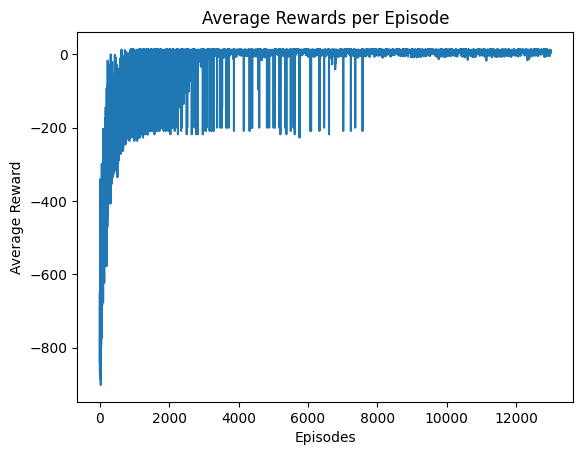

In [105]:
import matplotlib.pyplot as plt

def plot_rewards(rewards):
    plt.plot(rewards)
    plt.title('Average Rewards per Episode')
    plt.xlabel('Episodes')
    plt.ylabel('Average Reward')
    plt.show()

plot_rewards(rewards)

In [83]:
def test_agent(agent, env, num_episodes):
    total_rewards = 0
    steps_per_episode = []

    for _ in range(num_episodes):
        state = env.reset()
        done = False
        steps = 0

        while not done:
            # Assuming your agent has a method for choosing an action based on state
            action_mask = np.ones(env.action_space.n)  # Assuming all actions are valid initially
            action = agent.choose_action(state, action_mask)
            state, reward, done, info = env.step(action)

            # Update the action mask from the info if available
            if "action_mask" in info:
                action_mask = info["action_mask"]

            total_rewards += reward
            steps += 1

        steps_per_episode.append(steps)

    avg_reward = total_rewards / num_episodes
    avg_steps = sum(steps_per_episode) / num_episodes
    return avg_reward, avg_steps


In [113]:
avg_reward, avg_steps = test_agent(agent, env, 100)  # Test for 100 episodes
print(f"Average Reward: {avg_reward}, Average Steps per Episode: {avg_steps}")

Average Reward: 7.79, Average Steps per Episode: 12.94
